(300, 100, 100)
(300, 10000)
(50, 10000)


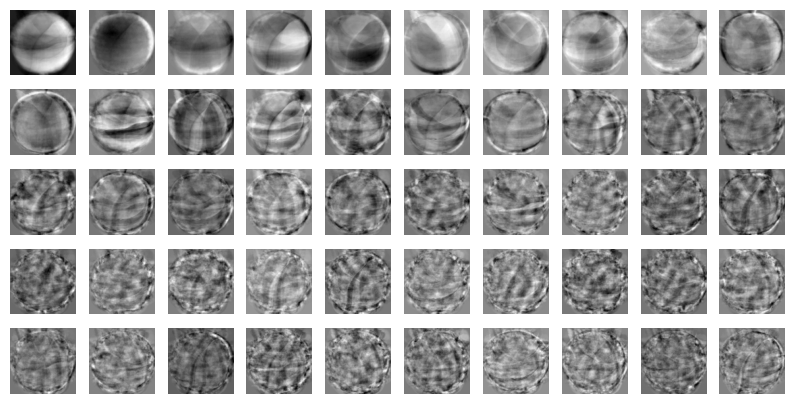

(300, 50)
(300, 10000)


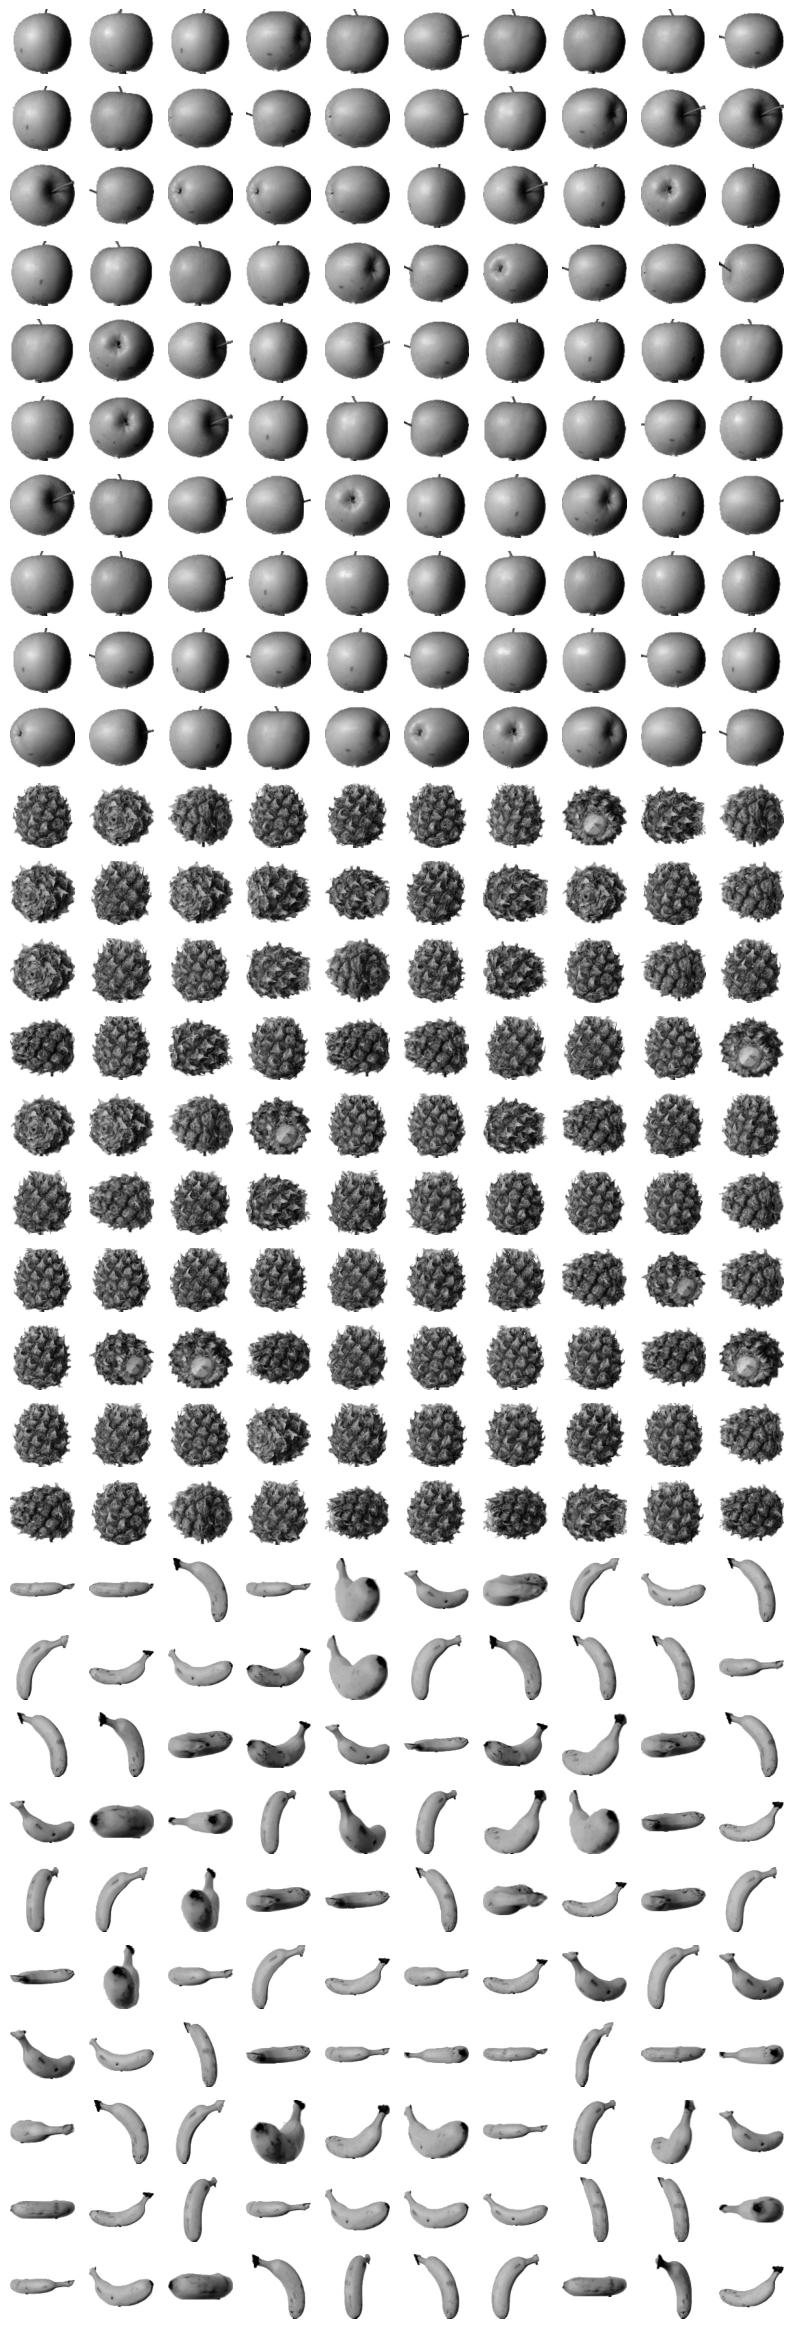

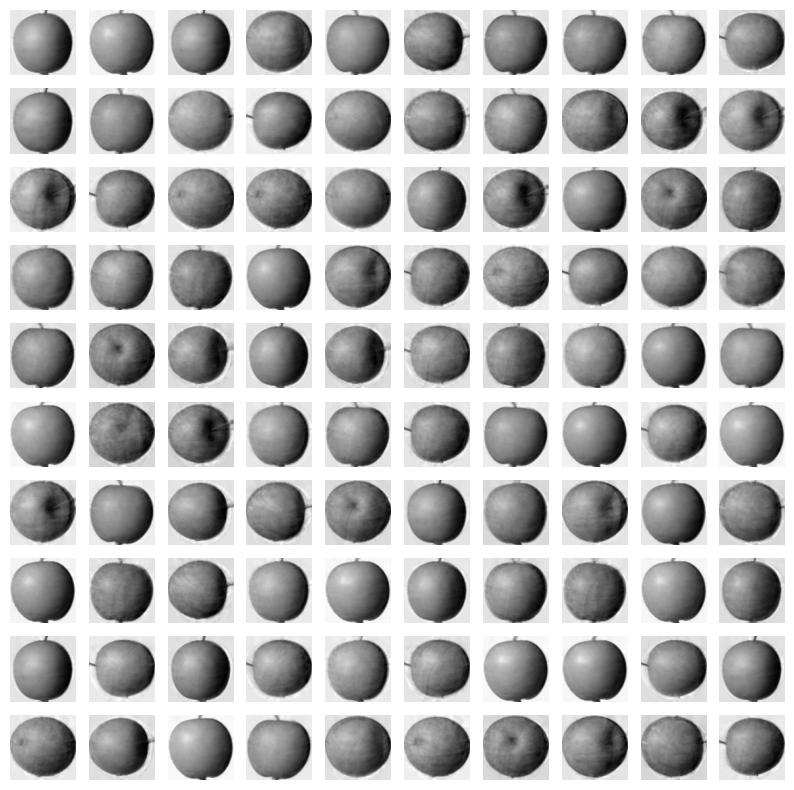

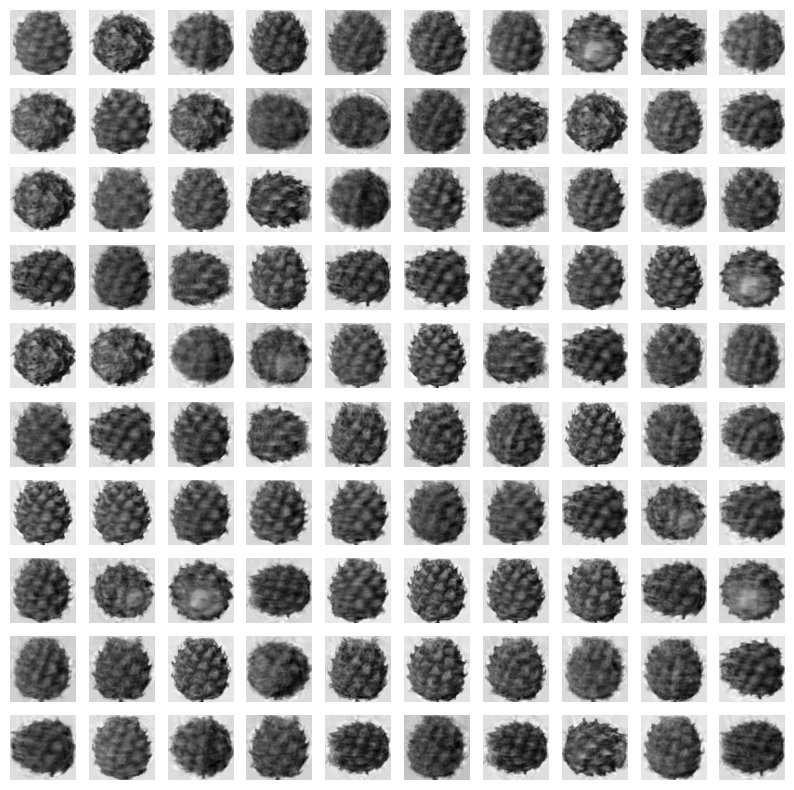

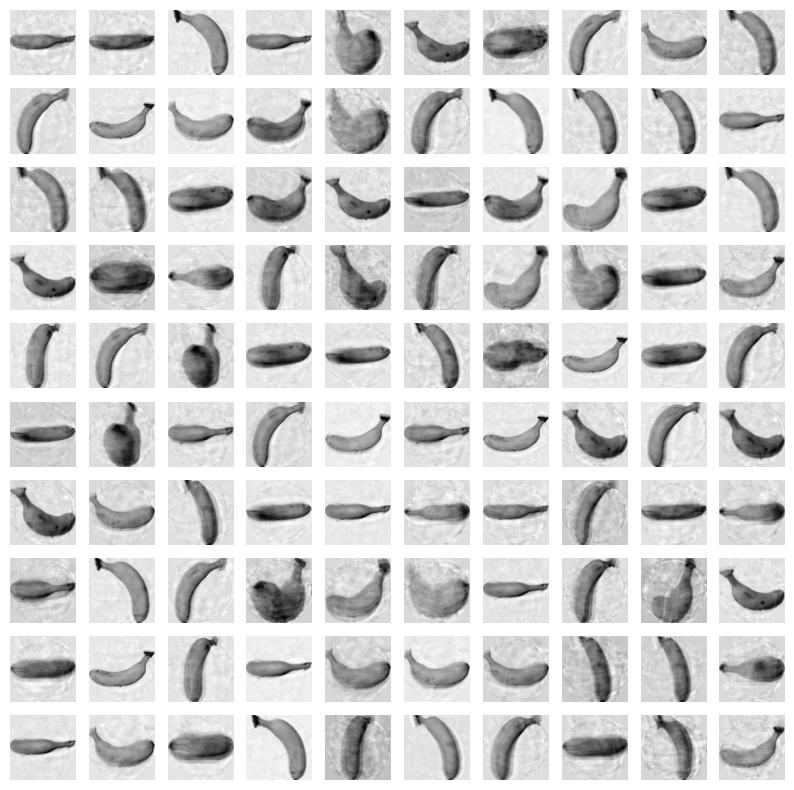



explainded_variance_ :  [13825250.21582006  3244970.17261192  2147002.11072805  1315766.76701665
  1115261.57182827  1071019.42512497   839909.33515197   670735.97207953
   447908.41085045   438278.50238403   376058.33820167   308314.2734991
   286653.15106416   276360.41521923   226209.96475078   210588.30059076
   188950.42383515   166855.40777262   158754.34209875   156784.20536449
   146173.19763705   142739.22277306   133183.87663951   127123.56911143
   121564.53013381   117269.75449317   108187.02907091   103741.03488558
    99335.83830736    99142.97010528    94296.68084197    90039.84302961
    86457.61944607    83535.40847083    82277.6089772     80741.2875085
    78195.88965821    75238.34751962    72428.79703203    70612.95997991
    69860.26203898    63960.08198553    63007.20279676    62378.42078437
    60131.96733635    59132.65535541    56676.0754828     55000.2885733
    52822.45609425    51863.99934223]
[0.42357017 0.09941755 0.06577863 0.04031172 0.03416875 0.03281

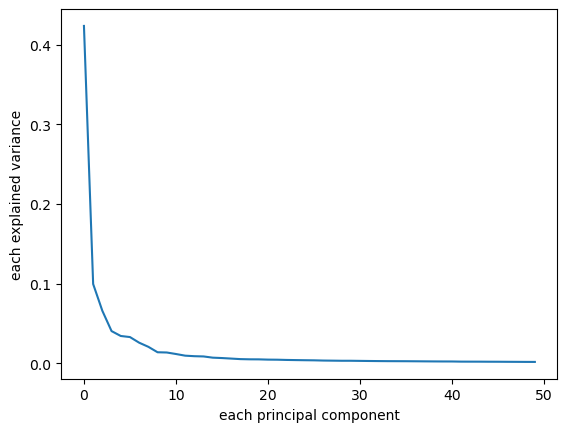

In [15]:
#####PCA-Principle Component Analysis
import urllib.request
url = 'https://bit.ly/fruits_300_data'
file_name = 'fruits_300.npy'
urllib.request.urlretrieve(url, file_name)

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits.shape)
print(fruits_2d.shape)

from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) #n은 첫번째 parameter의 길이)
    rows = int(np.ceil(n/10))              #ceil()은 ceiling funtion() 즉 ceil(x)는 x보다 크거나 같은 가장 작은 정수를 리턴한다.
    cols = n if rows < 2 else 10           #row < 2를 만족하면 cols = n 그렇지 않으면 cols = 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i,j].imshow(arr[i*10 + j], cmap = 'gray_r')
            axs[i,j].axis('off')
    plt.show()


draw_fruits(pca.components_.reshape(-1,100,100))
#위의 코드로 인해서 표현된 그림의 순서는 variance가 높은 순서의 eigen vector를 그림으로 표현한 것이다.
#300장의 그림 집합을 잘 설명할 수 있는 어떤 특징들을 잡아낸 것으로도 생각할 수 있다.

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

##dimension reduction과정에서 원본 데이터의 손실은 일어날 수 밖에 없다. 하지만 가장 분산이 큰 방향으로 압축하였으니 상당 부분 복구할 수 있다.
##원본 데이터와 복구 데이터를 둘 다 출력해서 비교해 보자.

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

#original
draw_fruits(fruits)
plt.close()

#restore
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print('\n')

#explained variance
print('explainded_variance_ : ', pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('each principal component')
plt.ylabel('each explained variance')
plt.show()
#As you can see on plot, first 10 components explain alomost variance

In [6]:
#Use PCA with other algorithm
print('\n\n---------- from now, outputs are for LogisticRegression -------------')
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)
print(target)

from sklearn.model_selection import cross_validate
#cross_validate on original fruit data
scores = cross_validate(lr, fruits_2d, target, return_train_score = True)
print('train score - original  : ', np.mean(scores['train_score']))
print('test score - original : ', np.mean(scores['test_score']))
print('process delay - original : ', np.mean(scores['fit_time']))

#cross_validate on data that reduction dimension using PCA
scores = cross_validate(lr, fruits_pca, target, return_train_score = True)
print('train score - PCA  : ', np.mean(scores['train_score']))
print('test score - PCA : ',np.mean(scores['test_score']))
print('process delay - PCA : ',np.mean(scores['fit_time']))


#cross validate using only 2 principal components
print('\n\n---------- from now, outputs are for LogisticRegression(Only use 2 principal components -------------')
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
scores = cross_validate(lr, fruits_pca, target, return_train_score = True)
print('train score - PCA  : ', np.mean(scores['train_score']))
print('test score - PCA : ',np.mean(scores['test_score']))
print('process delay - PCA : ',np.mean(scores['fit_time']))



---------- from now, outputs are for LogisticRegression -------------
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
train score - original  :  1.0
test score - original :  0.9966666666666667
process delay - original :  0.24093761444091796
train score - PCA  :  1.0
test score - PCA :  0.99
process delay - PCA :  0.015079259872436523


---------- from now, outputs are for LogisticRegression(Only use 2 principal components ----------

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2
(300, 2)
train score - PCA  :  1.0
test score - PCA :  0.99
process delay - PCA :  0.014867830276489257


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




---------- from now, outputs are for Kmeans Algorithm -------------
2
(300, 2)
(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


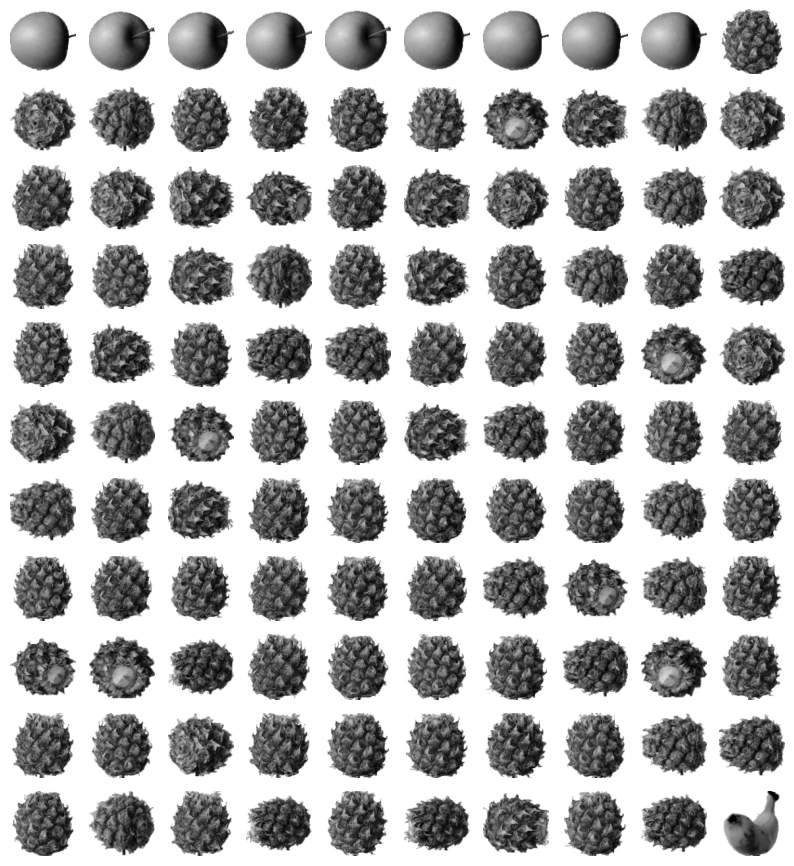

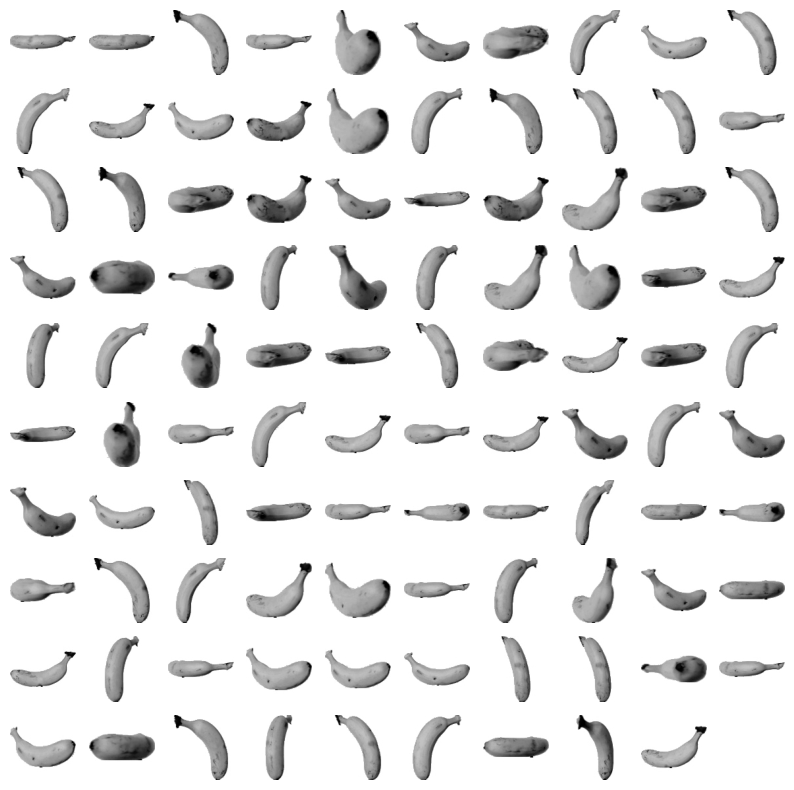

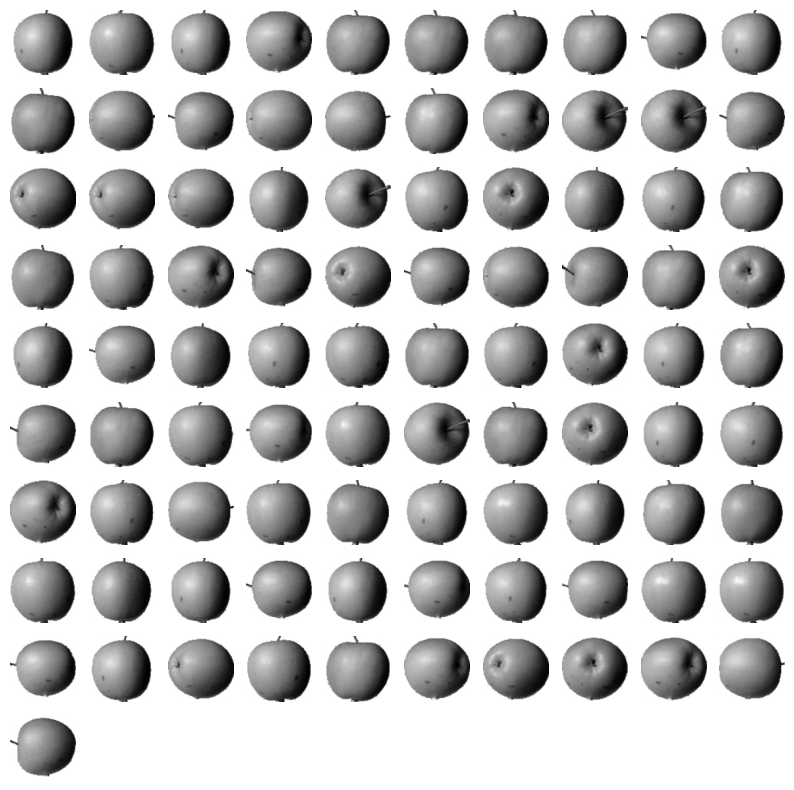

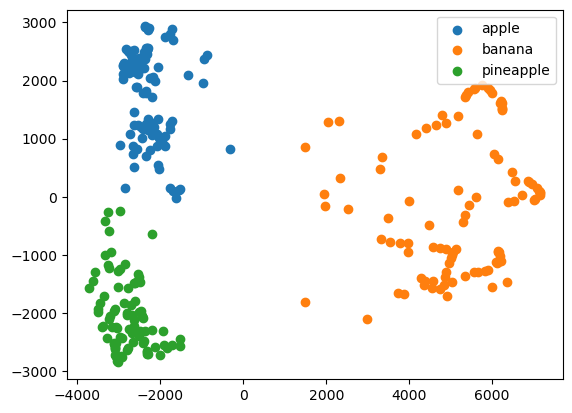

In [10]:
print('\n\n---------- from now, outputs are for Kmeans Algorithm -------------')
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()